<a href="https://colab.research.google.com/github/Schumpeter1929/Liga-Espa-ola-Power-BI/blob/main/carrera_ny.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GANADORES DE LA MARATON  DE NY 1970 -2020

In [13]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded=files.upload()

Saving nyc_marathon.csv to nyc_marathon (1).csv


In [14]:
filename=next(iter(uploaded))
df=pd.read_csv(filename)

In [15]:
df.shape

(102, 7)

In [18]:
df1=df.dropna(subset=['name'])
df1.shape

(99, 7)

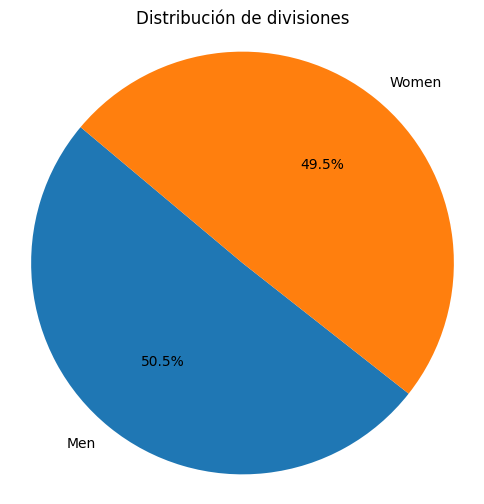

In [56]:
division_count = df1['division'].value_counts()

# Crear el gráfico circular
plt.figure(figsize=(6, 6))
plt.pie(division_count, labels=division_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de divisiones')
plt.axis('equal')  # Hacer que el gráfico sea circular
plt.show()

In [57]:
import folium
from geopy.geocoders import Nominatim


In [58]:
coordenadas = {'United States': [37.0902, -95.7129],
               'Norway': [60.472, 8.4689],
               'New Zealand': [-40.9006, 174.886],
               'Italy': [41.8719, 12.5674],
               'Kenya': [-0.0236, 37.9062],
               'United Kingdom': [55.3781, -3.4359],
               'Tanzania': [-6.369, 34.8888],
               'Poland': [51.9194, 19.1451],
               'Mexico': [23.6345, -102.5528],
               'South Africa': [-30.5595, 22.9375],
               'Australia': [-25.2744, 133.7751],
               'Germany': [51.1657, 10.4515],
               'Romania': [45.9432, 24.9668],
               'Switzerland': [46.8182, 8.2275],
               'Morocco': [31.7917, -7.0926],
               'Russia': [61.524, 105.3188],
               'Ethiopia': [9.145, 40.4897],
               'Latvia': [56.8796, 24.6032],
               'Brazil': [-14.235, -51.9253],
               'Eritrea': [15.1794, 39.7823]}

In [59]:
df_coordendas=pd.DataFrame(list(coordenadas.items()), columns=['country', 'coordenadas'])

In [60]:
df2=pd.merge(df1,df_coordendas,on='country', how='left')


In [61]:
df2.shape

(99, 8)

In [62]:
corredores=df2['country'].value_counts()
corredores

country
Kenya             27
United States     23
Norway            10
United Kingdom     7
Italy              5
Mexico             5
Ethiopia           5
New Zealand        2
Brazil             2
Latvia             2
South Africa       2
Morocco            1
Russia             1
Australia          1
Switzerland        1
Romania            1
Germany            1
Poland             1
Tanzania           1
Eritrea            1
Name: count, dtype: int64

In [63]:
df_corredores=pd.DataFrame(list(corredores.items()), columns=['country', 'corredores'])
df_corredores

,country,corredores
0,Kenya,27
1,United States,23
2,Norway,10
3,United Kingdom,7
4,Italy,5
5,Mexico,5
6,Ethiopia,5
7,New Zealand,2
8,Brazil,2
9,Latvia,2


In [64]:
df3=pd.merge(df_corredores,df_coordendas,on='country', how='left')
df3.shape

(20, 3)

In [65]:
df3.columns

Index(['country', 'corredores', 'coordenadas'], dtype='object')

In [66]:
import folium

# Crear un mapa centrado en una ubicación inicial
mapa = folium.Map(location=[0, 0], zoom_start=2)

# Iterar sobre las filas del DataFrame df3
for index, row in df3.iterrows():
    coordenadas = row['coordenadas']
    corredores = row['corredores']
    pais = row['country']
    # Agregar un marcador al mapa para cada conjunto de coordenadas
    folium.Marker(location=coordenadas, popup=f'{pais}: {corredores} corredores').add_to(mapa)

# Mostrar el mapa
mapa


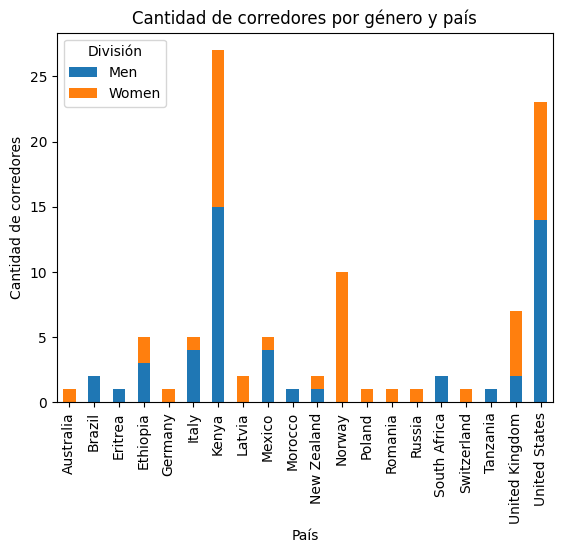

In [67]:
division_por_pais = df2.groupby(['country', 'division'])['division'].count().unstack().fillna(0)

# Graficar los resultados
division_por_pais.plot(kind='bar', stacked=True)
plt.xlabel('País')
plt.ylabel('Cantidad de corredores')
plt.title('Cantidad de corredores por género y país')
plt.legend(title='División')
plt.show()

# Sección nueva